<a href="https://colab.research.google.com/github/Urvi-M/BE559/blob/main/Homework3_part2_v1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Homework 3.2 (36 points)

**Learning objectives:**

In this assignment, we will continue our examination of methods for data classification. We will explore:

*   Probabilistic discriminitive models
*   Naive Bayes classification


---

## Part 1
Load the same libraries that we used in previous homeworks.

*   `numpy` (as `np`)
*   `matplotlib.pyplot` (as `plt`)

*   `from sklearn.discriminant_analysis import LinearDiscriminantAnalysis`
*   `import pandas as pd`

As always, now is also a good time to set the default font size to 16.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
plt.rcParams.update({'font.size': 16})

---
## Part 2 (2 points)

First, we will continue to examine Fisher's linear discriminant, and see how we can compute the conditional probabilities of data points belonging to different classes, $P(Class | X)$.

*   Load the Fisher's Iris dataset.  This famous dataset includes measurements from three related species of flowers. These data are stored in a .csv (comma separated values) file at the following URL:

https://raw.githubusercontent.com/BU-BME-DataSci-ML/Spring-2023/main/Homework3/FishersIris.csv

*    To do this, use the pandas function `pd.read_csv` to create a `pandas` DataFrame.
*    Construct the variables **`sl`**, **`sw`**, and **`snum`** in the same way as described in *Homework 3.1*.
*    Filter the entries in the three variables above so as only to include data for *Iris setosa* and *Iris versicolor* (i.e. only keep entries where **`snum`** < 2).
*    It will also be helpful to create an additional variable **`meas`**, in which **`sl`** and **`sw`** are combined into a 2xN matrix, where N is the number of measurements.  


In [2]:
df =pd.read_csv('https://raw.githubusercontent.com/BU-BME-DataSci-ML/Spring-2023/main/Homework3/FishersIris.csv')
sl=np.array(df['sepallength'])
sw=np.array(df['sepalwidth'])
species=np.array(df['class'])
df.replace('Iris-setosa', 0, inplace=True)
df.replace('Iris-versicolor', 1, inplace=True)
df.replace('Iris-virginica', 2, inplace=True)
snum=np.array(df['class'])
sl=sl[snum<2]
sw =sw[snum<2]
meas= np.array([sl,sw])
print(np.shape(meas))

(2, 100)


---
## Part 3 (4 points)

Write a function to perform linear discriminant analysis (LDA) as in *Homework 3.1*.  This function should accept **`meas`** and **`snum`** as input arguments and return:

*   **`mu`**: A 2x2 matrix containing the coordinates of the centroid of class 1 (row 1) and centroid of class 2 (row 2).

*   **`C`**: The within-class covariance matrix of your data.

*   **`vec`**: The (1x2) discriminant vector.

Print the values in vec to ensure you get the same answer as last time.

In [48]:
def lda(meas,snum):
  #class centroids
  mu1 = np.mean(meas[:, snum[0:100]== 0], axis = 1)
  mu2 = np.mean(meas[:, snum[0:100]== 1], axis = 1)
  # mulv = np.mean(meas[0,50:100])
  # muwv = np.mean(meas[1,50:1000])
  # mu2 = np.array([mulv,muwv])
  # mu1 = np.array([muls,muws])
  mu = np.vstack((mu1, mu2))

  # within-class covariance matrix - same for each class
  C1 = np.cov(meas[:, snum[0:100]== 0])
  C2 = np.cov(meas[:, snum[0:100]== 1])
  c = (C1 + C2)/2  #pooled covariance
  print(np.shape(c))

  # Compute discriminant vector
  vec = np.dot(np.linalg.inv(c), (mu2 - mu1))

  return mu,c,vec

mu, c, vec = lda(meas, snum)
print("Discriminant vector (vec):", vec)


(2, 2)
Discriminant vector (vec): [ 11.41009783 -14.00524467]


---
## Part 4 (4 points)

Remember that

$P(C_2| x) = \sigma(-a)$

where

$a = W^Tx - w_0$

with

$W = \Sigma^{-1}(\mu_2-\mu_1)$ (the projection along the LDA vector)

$w_0 = -{\frac{1}{2}} \mu_1^T\Sigma^{-1}\mu_1 + {\frac{1}{2}} \mu_2^T\Sigma^{-1}\mu_2 + ln{\frac{P(C_1)}{P(C_2)}}$ (the threshold that separates classes along the vector)

*   Calculate $P(Iris-versicolor| x)$.
*   In the first axes, plot this probability as a function of $a$ for your data points over the corresponding logistic function.
*   In the second axes, use `matplotlib`'s `scatter` method to plot sepal width vs. sepal length and color each point according to $P(Iris-versicolor| x)$. Set `cmap='coolwarm'` and use `fig.colorbar` to show the color scale.

0.9999999654691493


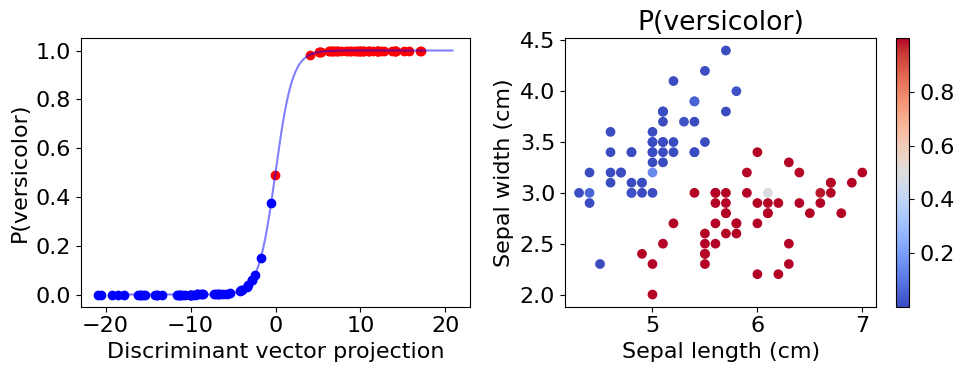

In [87]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

W = np.linalg.inv(c) @ (mu[1] - mu[0])
w0 = (-0.5 * np.dot(mu[0], np.dot(np.linalg.inv(c), mu[0]))) + (0.5 * np.dot(mu[1], np.dot(np.linalg.inv(c), mu[1]))) + (np.log(0.5/0.5))
a_s = np.dot(W.T, meas[:, snum[0:100]== 0]) - w0
a_v = np.dot(W.T,meas[:, snum[0:100]== 1]) - w0
#P(Iris-versicolor|x)
P_s = sigmoid(-a_s)
P_v = sigmoid(-a_v)
P_Iris_versicolor_given_x = np.array([P_v,P_s])
print(np.max(P_s))

fig, ax= plt.subplots(1, 2, figsize = (10, 4))
ax[0].plot(np.linspace(np.min(a_s), np.max(a_v), 1000), 1 / (1 + np.exp(-np.linspace(np.min(a_s), np.max(a_v), 1000))), color='blue',alpha=0.5)
ax[0].scatter(-a_s, P_s, marker = 'o', color='r')
ax[0].scatter(-a_v, P_v, marker = 'o', color='b')

ax[0].set_xlabel('Discriminant vector projection')
ax[0].set_ylabel('P(versicolor)')

sc = ax[1].scatter(meas[0], meas[1], c = P_Iris_versicolor_given_x, cmap = 'coolwarm')
ax[1].set_xlabel('Sepal length (cm)')
ax[1].set_ylabel('Sepal width (cm)')
ax[1].set_title('P(versicolor)')
fig.colorbar(sc, ax = ax[1])

plt.tight_layout()
plt.show()

Great!  Now we see how we can calculate the probability that each data point belongs to each class.  Here, Our results are not cross-validated.  Our probabilistic classifier is being applied to the same data used to construct the classifier, but this process involves estimation of a small number of parameters and so the risk of cross validation is somewhat low.

---
## Part 5 (2 points)

Next, we will construct a **naive Bayes classifier** and use it to classify tweets.  We will use two datasets:

1) The tweets of Donald Trump

2) Tweets about Covid-19

We will construct a probabilistic discriminant function that gives us the probability of tweets belonging to each set.

*   Use `pd.read_csv` to load the following datasets into two dataframes

https://raw.githubusercontent.com/BU-BME-DataSci-ML/Spring-2023/main/Homework3/Corona_NLP_train.csv
https://raw.githubusercontent.com/BU-BME-DataSci-ML/Spring-2023/main/Homework3/realdonaldtrump.csv

**NOTE:**  For the first dataset, you will also have to set `encoding='latin-1'` for the tweets to be read correctly.

*   Create numpy arrays called `set1tweets` and `set2tweets` from the appropriate column of each dataframe (i.e. the one containing the tweet text).

In [64]:
covid = pd.read_csv('https://raw.githubusercontent.com/BU-BME-DataSci-ML/Spring-2023/main/Homework3/Corona_NLP_train.csv', encoding = 'latin-1')
trump = pd.read_csv('https://raw.githubusercontent.com/BU-BME-DataSci-ML/Spring-2023/main/Homework3/realdonaldtrump.csv')

set1tweets = covid['OriginalTweet'].values
set2tweets = trump['content'].values
np.shape(set1tweets)

(41157,)

Below is a function that we'll use to clean up our tweets.  It makes all of the text lowercase, and removes common words, words that would be unfair to use, special characters, URLs, etc.

In [62]:
import re
stopwords = ["that", "have", "be", "i", "with", "we", "you", "for", "on", "an", "a", "of", "and", "in", "the", "to", "from", "at", "is", "are", "it", "as", "by", "com", "or", "amp", "s", \
             "not", "all", "will", "my", "they", "was", "this", "has", "your", "our", "realdonaldtrump", "donald", "trump", "covid", "19"]

def clean_tweet(tweet):
    if type(tweet) == float:
        return ""
    temp = tweet.lower()
    temp = re.sub('([A-Za-z]+)[\'`]([A-Za-z]+)', r'\1'r'\2', temp)
    temp = re.sub("@[A-Za-z0-9_]+","", temp)
    temp = re.sub("#[A-Za-z0-9_]+","", temp)
    temp = re.sub("\[A-Za-z0-9_.]+","", temp)
    temp = re.sub(r'http\S+', '', temp)
    temp = re.sub('[()!?&]', ' ', temp)
    temp = re.sub('\[.*?\]',' ', temp)
    temp = re.sub("[^a-z0-9]"," ", temp)
    temp = temp.split()
    temp = [w for w in temp if not w in stopwords]
    temp = " ".join(word for word in temp)
    return temp

---
## Part 6 (4 points)

Set the random seed to 5.

Create training and testing sets for each class.  From each set of tweets, randomly select 1000 entries (without replacement) as the test set.  As before, you can use `np.random.choice`.  Store them in variables called `test1` and `test2`.  Store the remaining tweets in variables called `train1` and `train2`.  

In [65]:
np.random.seed(5)
test1 = set1tweets[np.random.choice(len(set1tweets), 1000, replace = False)]
test2 = set2tweets[np.random.choice(len(set2tweets), 1000, replace = False)]
train1 = np.delete(set1tweets, np.random.choice(len(set1tweets), 1000, replace = False))
train2 = np.delete(set2tweets, np.random.choice(len(set2tweets), 1000, replace = False))

---
## Part 7 (2 points)

For each tweet in each training set, use your `clean_tweet` function to clean up the text and the `.split(' ')` method to split each tweet at whitespaces into its component words.  For each training set, create a list of lists of the words.  The variable should have the same number of elements as there are tweets in the training set, and each entry in the list should contain all of the words in the tweet in separate elements.

This can be done efficiently with a list comprehension.

In [66]:
clean_train1 = [clean_tweet(tweet).split() for tweet in train1]
clean_train2 = [clean_tweet(tweet).split() for tweet in train2]

---
## Part 8 (2 points)

*   Use the function below to create a counter object for each set that contains the number of occurrences of each word in each dataset.  This object is a type of dictionary - a python data type that stores key:value pairs.  In this case, the keys are the words in the dataset and the values are the number of occurrences.

*   Use the `most_common` method to display the 20 most common words in each dataset and the number of times they were found.

In [67]:
from collections import Counter

def count_words(word_array):

    all_words = []

    for tweet in word_array:
        all_words += tweet
    c = Counter(all_words)

    return(c)


In [71]:
train1_count = count_words(clean_train1)
train2_count = count_words(clean_train2)

In [72]:
print(train1_count.most_common(20))
print(train2_count.most_common(20))

[('prices', 7654), ('store', 6716), ('food', 6709), ('supermarket', 6563), ('grocery', 5946), ('people', 5451), ('consumer', 4306), ('can', 4053), ('up', 3786), ('out', 3769), ('more', 3647), ('but', 3474), ('if', 3472), ('shopping', 3299), ('online', 3285), ('how', 3257), ('their', 3146), ('during', 3128), ('now', 3050), ('so', 3022)]
[('great', 6593), ('he', 4038), ('twitter', 3621), ('thank', 2991), ('president', 2903), ('so', 2833), ('just', 2663), ('people', 2644), ('pic', 2561), ('very', 2471), ('no', 2324), ('do', 2317), ('thanks', 2289), ('but', 2229), ('who', 2154), ('me', 2076), ('what', 2049), ('his', 2047), ('now', 2042), ('would', 1948)]


---
## Part 9 (4 points)

Write a function that computes $log(\frac{P(Trump| x)}{P(Covid| x)})$ using a naive Bayes classifier.

The main input to this function should be an array of words in a single tweet. You will also need to input both set counter objects, and anything you might need to calculate $P(Class)$.

Recall that:

$P(Class| x) \propto P(Class)P(x_1|Class)P(x_2|Class)\cdot\cdot\cdot P(x_n|Class)$


To calculate each probability, you will need to compute:

$P(Class)$: The number of tweets in the class divided by the total number of tweets in both classes (the prior probability).

$P(X_i|Class)$: the probability of the $ith$ word in the tweet being randomly selected from all of the words observed in the Class.  

To calculate the conditional probability, divide the number of occurrences of the word in the class (plus one to avoid multiplying-by-zeros) by the total number of words in the class (i.e. the sum of the counts for all words).  A counter object has a `.values` method that makes this easy to calculate.

In [73]:
class_= len(clean_train1)

def naive(tweet,c,class_):
    P_class = class_/(2 * class_) #P(Class)
    log_probability = np.log(P_class)

    for word in tweet:
        word_count = c[word] if word in c else 0
        P_X_Class = (word_count + 1)/(len(c)) #P(X|Class)
        log_probability += np.log(P_X_Class)
    return log_probability

---
## Part 10 (2 points)

Write a function that iterates over all of the tweets in a list of tweets and for each tweet calculates $log(\frac{P(Trump| x)}{P(Covid| x)})$ (the "log odds") for each tweet using the function from **Part 9**.  This function should return an array the length of the list of tweets that contains all of the log odds values.

Call this function with each test set to determine the log odds of the tweets in each set.

In [76]:
def logodds(test, train1_count, train2_count):
    logodds = [] #initialize the list to store log odds
    for tweet in test:
        cleaned_tweet = clean_tweet(tweet)
        log_probability_covid = naive(cleaned_tweet.split(), train1_count, class_)
        log_probability_trump = naive(cleaned_tweet.split(), train2_count, class_)
        logodds.append(log_probability_trump - log_probability_covid)
    return logodds

logcovid = logodds(test1, train1_count, train2_count)
logtrump = logodds(test2, train1_count, train2_count)

---
## Part 10 (2 points)

Plot a histogram of the log odds of tweets in the trump test set and the covid test set.

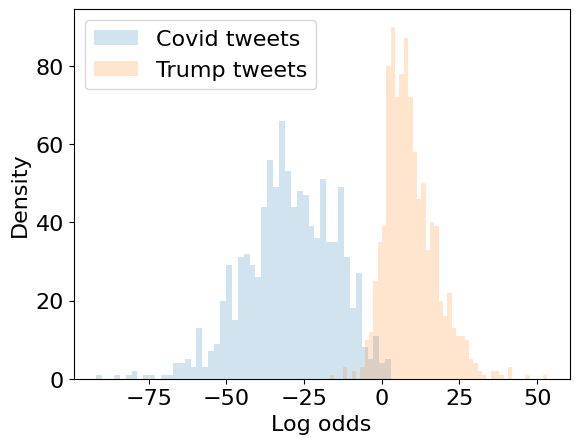

In [79]:
plt.hist(logcovid, bins = 50, alpha = 0.2, label = 'Covid tweets')
plt.hist(logtrump, bins = 50, alpha = 0.2, label = 'Trump tweets')
plt.xlabel('Log odds')
plt.ylabel('Density')
plt.legend()
plt.show()

---
## Part 11 (2 points)

Calculate the true positive rate, false positive rate, true negative rate, and false negative rate and display the values.  Note that if $P(A)<P(B)$, then $log(\frac{P(B)}{P(A)})$ will be a positive number.

Calculate the classification accuracy and display it.

In [88]:
#since positive odds are in the trump set
t_p = np.sum(1 for l in logcovid if l < 0)
f_p = np.sum(1 for l in logtrump if l < 0)
t_n = np.sum(1 for l in logtrump if l >= 0)
f_n = np.sum(1 for l in logcovid if l >= 0)

tpr = t_p/(t_p + f_n)
fpr = f_p/(f_p + t_n)
tnr = t_n/(t_n + f_p)
fnr = f_n/(f_n + t_p)
a = (t_p + t_n)/(t_p + f_p+ t_n + f_n)

print(f"True positive rate:{tpr:.3f}")
print(f"True negative rate:{tnr:.3f}")
print(f"False positive rate:{fpr:.3f}")
print(f"False negative rate:{fnr:.3f}")
print(f"Accuracy:{a:.3f}")

True positive rate:0.994
True negative rate:0.916
False positive rate:0.084
False negative rate:0.006
Accuracy:0.955


<ipython-input-88-82c733cbb588>:2: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  t_p = np.sum(1 for l in logcovid if l < 0)
<ipython-input-88-82c733cbb588>:3: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  f_p = np.sum(1 for l in logtrump if l < 0)
<ipython-input-88-82c733cbb588>:4: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  t_n = np.sum(1 for l in logtrump if l >= 0)
<ipython-input-88-82c733cbb588>:5: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  f_n = 

---
## Part 12 (2 points)

Display the following tweets from the Covid test set:
*   The 2 most likely to be from the Covid set.
*   The 2 least likely to be from the Covid set.

Display the following tweets from the Trump test set:
*   The 2 most likely to be from the Trump set.
*   The 2 least likely to be from the Trump set.

The numpy method `argsort` is useful for accomplishing this.

In [89]:
most_covid = np.argsort(logcovid)[-2:]
least_covid = np.argsort(logcovid)[:2]

print("most covid-like covid tweets")
for index in most_covid:
  print(test1[index])

print("most trump-like covid tweets")
for index in least_covid:
    print(test1[index])

most_trump = np.argsort(logtrump)[-2:]
least_trump = np.argsort(logtrump)[:2]

print("most covid-like trump tweets")
for index in least_trump:
  print(test2[index])

print("most trump-like trump tweets")
for index in most_trump:
  print(test2[index])

most covid-like covid tweets
I knew it was going to be bad...but not this bad https://t.co/IaACfFlNAx
Happy first birthday Jack
most trump-like covid tweets

https://t.co/CFiMcaoAOe

#CoronavirusPandemic #CoronaVirusUpdate https://t.co/kpLy2WHOuC
most covid-like trump tweets
It is a wonderful feeling to know that our States are loaded up with Ventilators, many brand new and high quality just off of our production lines, and that we are now in a position to help other countries that so desperately need them. Every person needing a Ventilator got one!
" @ SueGriffiths19 Been a bit quiet lately? Told my job is at risk NY - any tips to cheer me up?" Be positive, do your best!
most trump-like trump tweets
...Crooked Hillary Clinton in 2016. They are called SUPPRESSION POLLS, and are put out to dampen enthusiasm. Despite 3 ½ years of phony Witch Hunts, we are winning, and will close it out on November 3rd!pic.twitter.com/4IhuLUZjsv
....He loves our Military and supports our Vets! Democrat Ji


<font color='red'>**SHORT ANSWER (4 points):** A Naive Bayes classifier assumes no covariance between features.  Would you expect features to covary in this dataset?  Why or why not?</font>  

Since the classifier in this scenario uses the odds of words in the class there are chances of the trum dataset having covid relevant words and maybe vice versa, establishing a degree of co-variance.